In [2]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from pprint import pprint
from src.datasets import get_text
from src.tokenization import tokenize

In [3]:
data = get_text()

In [4]:
wf = Counter()
tf = dict()
idf = Counter()

for email, text in data[['email', 'text']].values:
    counter = Counter()
    if text is None:
        continue
    tokens = tokenize(text)
    if len(tokens) < 20:
        continue
    for token in tokens:
        counter[token] += 1
        wf[token] += 1
    for token in counter:
        idf[token] += 1
    tf[email] = counter

In [11]:
unique_score = dict()
for email, user_tf in tf.items():
    user_tf = tf[email]
    user_corr = 0
    norm_koef = 0
    for token in wf.keys():
        user_corr += user_tf[token] / idf[token]
        norm_koef += user_tf[token]
    user_corr /= norm_koef
    unique_score[email] = user_corr

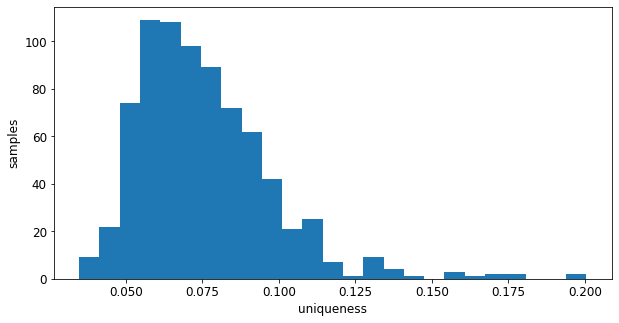

In [33]:
plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 12})
plt.xlabel("uniqueness")
plt.ylabel("samples")
_ = plt.hist(unique_score.values(), bins=25)
plt.savefig("image.jpg")

In [13]:
sorted_unique_score = sorted(unique_score.items(), key=lambda x: x[1])
pprint(sorted_unique_score[:10])
print()
pprint(sorted_unique_score[-10:])

[('ChernovaSg@mail.ru', 0.03480349654185906),
 ('azhiryakova@sfedu.ru', 0.037397341489409805),
 ('fenelayar@gmail.com', 0.03760874510004683),
 ('gromo.lina@yandex.ru', 0.03849553150896353),
 ('yarkova_on@mail.ru', 0.03928844351651461),
 ('AndreevaLV2011@ya.ru', 0.039872610428330145),
 ('shmytkovaa@sfedu.ru', 0.04023645284916186),
 ('olyamishin@gmail.com', 0.04032611190663943),
 ('np.gracheva@omgau.org', 0.04123925875350678),
 ('chiztim@list.ru', 0.04151772655949863)]

[('dsmila622@gmail.com', 0.15448646616629677),
 ('2e-s@mail.ru', 0.15590441096958216),
 ('vita250803@mail.ru', 0.1581314131700031),
 ('kiva_hamzina@mail.ru', 0.16368416945435654),
 ('Irina3980@mail.ru', 0.1688595125310567),
 ('alex.t29051978@gmail.com', 0.17068308424595846),
 ('373foxy@mail.ru', 0.17749742231943677),
 ('alexis-1@yandex.ru', 0.17757332776867601),
 ('dionisoren@mail.ru', 0.1996881969685926),
 ('alex.semenov@live.com', 0.2005177788728421)]


In [14]:
for key, val in unique_score.items():
    if key == 'zhiltsovaa.12@edu.ystu.ru':
        print(key, val)

zhiltsovaa.12@edu.ystu.ru 0.12967969479115296


In [35]:
x, y = [], []
for key in unique_score:
    x.append(len(tokenize(data[data.email == key].iloc[0].text)))
    y.append(unique_score[key])

plt.figure(figsize=(10, 5))
plt.xlabel("words")
plt.ylabel("uniqueness")

plt.scatter(x, y)
plt.savefig("corr")

In [16]:
np.corrcoef(x, y)

array([[ 1.        , -0.18379475],
       [-0.18379475,  1.        ]])